# The Solution of Nonlinear Equations
One of the most frequently occurring problems in scientific work is to find the roots of equations of the form
\begin{equation}
    f(x) = 0,
\end{equation}
i.e., zeros of the function $f(x)$.

## The Bisection Method
The first step to solving an equation is to verify that a root exists.
### Theorem
   Let $f$ be a continuous function on $[a, b]$, satisfying $f(a)f(b) < 0$. Then $f$ has a root between $a$ and $b$, that is, there exists a number $x^{*}$ satisfying $a < x^{*} < b$ and $f(x^{*}) = 0$.

### Bisection Method 
**Algorithm:**
```python
    Given initial interval [a, b] such that f (a)f (b) < 0 
    while (b − a)/2 > TOL:
        c = (a + b)/2
    if f (c) = 0:
        stop 
    if f(a)f(c) < 0:
        b=c 
    else:
        a=c
    The final interval [a,b] contains a root. 
    The approximate root is (a + b)/2.
```

**Python implementation:**

In [61]:
# environment setting, before any codes
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display

In [62]:
def bisect(f, a, b, tol):
    if (np.sign(f(a)*f(b)) >= 0):      # wrong input
        print ('$f(a)f(b) <0$ not satisfied')
        return
    fa = f(a) 
    fb = f(b)
    while ((b - a)/2) > tol:
        c = (a + b)/2;
        fc = f(c)
        if fc == 0:                 # c is a solution, done
            return c 
        if (np.sign(fc*fa) < 0):       # new interval [a, c]
            b = c; 
            fb = fc
        else:                       # new interval [c, b]
            a = c
            fa = fc
    return (a + b)/2                #new midpoint is best estimate

**Demonstration version:**

In [63]:
def bisect_iters(f, a, b, iters):
    fa = f(a) 
    fb = f(b)
    
    x = np.zeros(iters+1)
    for i in range(iters):
        c = (a + b)/2
        x[i] = c
        fc = f(c)
        if fc == 0:                 # c is a solution, done
            return c 
        if (np.sign(fc*fa) < 0):       # new interval [a, c]
            b = c; 
            fb = fc
        else:                       # new interval [c, b]
            a = c
            fa = fc
    x[iters] = (a + b)/2       
    return x              #new midpoint is best estimate

In [64]:
def fun(x):
    return np.exp(-x) - np.sin(np.pi/2*x)

Reference Solution:  0.4435735341042957
no.    solution    error bound    error
  0  0.5000000000   5.00e-01    5.64e-02
  1  0.2500000000   2.50e-01    1.94e-01
  2  0.3750000000   1.25e-01    6.86e-02
  3  0.4375000000   6.25e-02    6.07e-03
  4  0.4687500000   3.12e-02    2.52e-02
  5  0.4531250000   1.56e-02    9.55e-03
  6  0.4453125000   7.81e-03    1.74e-03
  7  0.4414062500   3.91e-03    2.17e-03
  8  0.4433593750   1.95e-03    2.14e-04
  9  0.4443359375   9.77e-04    7.62e-04
 10  0.4438476562   4.88e-04    2.74e-04


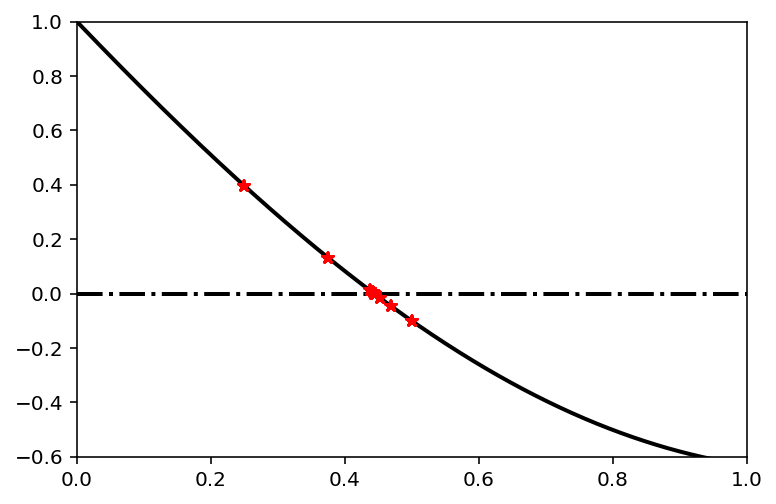

In [66]:
def Iteration_demo(f, a, b, iters):
    x = np.linspace(a, b, 1000)
    plt.plot(x, f(x), 'k', linewidth=2)
    plt.plot(x, 0*x, 'k-.', linewidth=2)
    x = bisect_iters(f, a, b, iters)
    x_ref = bisect(f, a, b, 1.e-14)
    
    #print (x)
    plt.xlim(0,1)
    plt.ylim(-0.6,1)
    for i in range(iters+1):
        plt.plot(x, f(x), 'r*', linewidth=2)
    
    print ('Reference Solution: ', x_ref)
    print ('no.    solution    error bound    error')
    for i in range(iters+1):
        print ("%3d  %12.10f   %7.2e    %7.2e" % \
                   (i, x[i], (b-a)/2**(i+1), np.abs(x_ref - x[i])))
    
        
a = 0
b = 1
Iteration_demo(fun, a, b, 10)


In [67]:
w = interactive(Iteration_demo, f=fixed(fun), a=fixed(0), b=fixed(1), iters=widgets.IntSlider(min=0,max=20,value=1))
display(w)

interactive(children=(IntSlider(value=1, description='iters', max=20), Output()), _dom_classes=('widget-interact',))